# Financial Planning with APIs and Simulations

In this Challenge, you’ll create two financial analysis tools by using a single Jupyter notebook:

Part 1: A financial planner for emergencies. The members will be able to use this tool to visualize their current savings. The members can then determine if they have enough reserves for an emergency fund.

Part 2: A financial planner for retirement. This tool will forecast the performance of their retirement portfolio in 30 years. To do this, the tool will make an Alpaca API call via the Alpaca SDK to get historical price data for use in Monte Carlo simulations.

You’ll use the information from the Monte Carlo simulation to answer questions about the portfolio in your Jupyter notebook.



In [30]:
# Import the required libraries and dependencies

import pandas as pd
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
import os
from dotenv import load_dotenv



In [31]:
# Load the environment variables from the .env file
#by calling the load_dotenv function
load_dotenv()


True

## Part 1: Create a Financial Planner for Emergencies

### Evaluate the Cryptocurrency Wallet by Using the Requests Library

In this section, you’ll determine the current value of a member’s cryptocurrency wallet. You’ll collect the current prices for the Bitcoin and Ethereum cryptocurrencies by using the Python Requests library. For the prototype, you’ll assume that the member holds the 1.2 Bitcoins (BTC) and 5.3 Ethereum coins (ETH). To do all this, complete the following steps:

1. Create a variable named `monthly_income`, and set its value to `12000`.

2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplies.

3. Navigate the JSON response object to access the current price of each coin, and store each in a variable.

    > **Hint** Note the specific identifier for each cryptocurrency in the API JSON response. The Bitcoin identifier is `1`, and the Ethereum identifier is `1027`.

4. Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.



In [32]:
# The current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

#### Step 1: Create a variable named `monthly_income`, and set its value to `12000`.

In [33]:
# The monthly amount for the member's household income

monthly_income = 12000

#### Review the endpoint URLs for the API calls to Free Crypto API in order to get the current pricing information for both BTC and ETH.

In [34]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets

btc_url = 'https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD'
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=USD'

# Make API calls using requests library
btc_response = requests.get(btc_url)
eth_response = requests.get(eth_url)



#### Step 2. Use the Requests library to get the current price (in US dollars) of Bitcoin (BTC) and Ethereum (ETH) by using the API endpoints that the starter code supplied.

In [35]:
# Using the Python requests library, make an API call to access the current price of BTC
#btc_response = # YOUR CODE HERE

# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable
# YOUR CODE HERE
# Check if API calls were successful (status code 200 indicates success)


# Check if API calls were successful (status code 200 indicates success)
if btc_response.status_code == 200 and eth_response.status_code == 200:
    # Access the current BTC and ETH prices from the JSON responses
    btc_price = btc_response.json()['data']['1']['quotes']['USD']['price']
    eth_price = eth_response.json()['data']['1027']['quotes']['USD']['price']

    # Print the current prices of BTC and ETH
    print("Current BTC price: USD", btc_price)
    print("Current ETH price: USD", eth_price)
else:
    # Print error message if API calls were not successful
    print("Error: API call unsuccessful.")


Current BTC price: USD 30003.0
Current ETH price: USD 1905.48


In [36]:
# Using the Python requests library, make an API call to access the current price ETH
# Use the json.dumps function to review the response data from the API call
# Use the indent and sort_keys parameters to make the response object readable

eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/'


eth_response = requests.get(eth_url)

# Check if API call was successful (status code 200 indicates success)
if eth_response.status_code == 200:
    # Use json.dumps to print response data in a readable format
    print(json.dumps(eth_response.json(), indent=4, sort_keys=True))
else:
    # Print error message if API call was not successful
    print("Error: API call unsuccessful. Status code:", eth_response.status_code)

{
    "data": {
        "1027": {
            "circulating_supply": 120437016,
            "id": 1027,
            "last_updated": 1681349355,
            "max_supply": 120437016,
            "name": "Ethereum",
            "quotes": {
                "USD": {
                    "market_cap": 229463217736,
                    "percent_change_1h": -0.639792253891294,
                    "percent_change_24h": 0.627981943715899,
                    "percent_change_7d": -0.306346481830661,
                    "percentage_change_1h": -0.639792253891294,
                    "percentage_change_24h": 0.627981943715899,
                    "percentage_change_7d": -0.306346481830661,
                    "price": 1905.48,
                    "volume_24h": 13128234445
                }
            },
            "rank": 2,
            "symbol": "ETH",
            "total_supply": 120437016,
            "website_slug": "ethereum"
        }
    },
    "metadata": {
        "error": null,
        "nu

#### Step 3: Navigate the JSON response object to access the current price of each coin, and store each in a variable.

In [37]:
# Navigate the BTC response object to access the current price of BTC

# Print the current price of BTC
# YOUR CODE HERE
btc_response = requests.get(btc_url)

# Check if API call was successful (status code 200 indicates success)
if btc_response.status_code == 200:
    # Use json.loads to convert the response data to a dictionary
    btc_data = json.loads(btc_response.content)

    # Access the current BTC price from the dictionary
    btc_price = btc_data['data']['1']['quotes']['USD']['price']
    print("Current BTC price:", btc_price)
else:
    # Print error message if API call was not successful
    print("Error: API call unsuccessful. Status code:", btc_response.status_code)

Current BTC price: 30003.0


In [38]:
# Navigate the BTC response object to access the current price of ETH

import requests

# Define the URL for the API endpoint that returns the current ETH price in USD
eth_url = 'https://api.alternative.me/v2/ticker/Ethereum/?convert=USD'

# Make the API call using the requests library
eth_response = requests.get(eth_url)

# Check if the API call was successful (status code 200 indicates success)
if eth_response.status_code == 200:
    # Access the current ETH price from the JSON response
    eth_price = eth_response.json()['data']['1027']['quotes']['USD']['price']
    
    # Print the current price of ETH
    print("Current ETH price: USD", eth_price)
else:
    # Print error message if API call was not successful
    print("Error: API call unsuccessful.")

Current ETH price: USD 1905.48


### Step 4: Calculate the value, in US dollars, of the current amount of each cryptocurrency and of the entire cryptocurrency wallet.

In [39]:
# Compute the current value of the BTC holding 
# Print current value of your holding in BTC

btc_balance = 1.5

# Compute the current value of your BTC holding
btc_value = btc_balance * btc_price

# Print the current value of your BTC holding
print("Current value of your holding in BTC: USD", btc_value)

Current value of your holding in BTC: USD 45004.5


In [40]:
# Compute the current value of the ETH holding 
# Print current value of your holding in ETH
# Define the amount of ETH you currently hold as rpeviously given 
eth_balance = 5.0

# Compute the current value of your ETH holding
eth_value = eth_balance * eth_price

# Print the current value of your ETH holding
print("Current value of your holding in ETH: USD", eth_value)

Current value of your holding in ETH: USD 9527.4


In [83]:
# Compute the total value of the cryptocurrency wallet
# Add the value of the BTC holding to the value of the ETH holding

total_crypto_wallet = btc_value + eth_value

# Print the current cryptocurrency wallet balance
print("Current cryptocurrency wallet balance: USD", total_crypto_wallet)
bitcoin_holdings = 1.2
ethereum_holdings = 5.3

bitcoin_valuation = bitcoin_holdings * btc_price
ethereum_valuation = ethereum_holdings * eth_price
crypto_valuation = bitcoin_valuation + ethereum_valuation

print(f"The current value of the Bitcoin holdings is ${bitcoin_valuation:.2f}")
print(f"The current value of the Ethereum holdings is ${ethereum_valuation:.2f}")
print(f"The current value of the cryptocurrency wallet is ${crypto_valuation:.2f}")


Current cryptocurrency wallet balance: USD 54531.9
The current value of the Bitcoin holdings is $36003.60
The current value of the Ethereum holdings is $10099.04
The current value of the cryptocurrency wallet is $46102.64


### Evaluate the Stock and Bond Holdings by Using the Alpaca SDK

In this section, you’ll determine the current value of a member’s stock and bond holdings. You’ll make an API call to Alpaca via the Alpaca SDK to get the current closing prices of the SPDR S&P 500 ETF Trust (ticker: SPY) and of the iShares Core US Aggregate Bond ETF (ticker: AGG). For the prototype, assume that the member holds 110 shares of SPY, which represents the stock portion of their portfolio, and 200 shares of AGG, which represents the bond portion. To do all this, complete the following steps:

1. In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

2. Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

3. Set the following parameters for the Alpaca API call:

    - `tickers`: Use the tickers for the member’s stock and bond holdings.

    - `timeframe`: Use a time frame of one day.

    - `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.

4. Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

5. Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

6. Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.


#### Review the total number of shares held in both (SPY) and (AGG).

In [42]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


#### Step 1: In the `Starter_Code` folder, create an environment file (`.env`) to store the values of your Alpaca API key and Alpaca secret key.

#### Step 2: Set the variables for the Alpaca API and secret keys. Using the Alpaca SDK, create the Alpaca `tradeapi.REST` object. In this object, include the parameters for the Alpaca API key, the secret key, and the version number.

In [43]:
# Set the variables for the Alpaca API and secret keys
# YOUR CODE HERE
# YOUR CODE HERE

# Create the Alpaca tradeapi.REST object
# YOUR CODE HERE
# Import the Alpaca SDK

import alpaca_trade_api as tradeapi


alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

import alpaca_trade_api as tradeapi

# Create the Alpaca REST object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [44]:
api_key = os.getenv("ALPACA_API_KEY")

api_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(api_key)
print(api_secret_key)

PK57R60BHCX5QZJL4KM6
ebmTyXdt5NU3pbgUVXqAoxPZRsnffhsEYiPYlove


#### Step 3: Set the following parameters for the Alpaca API call:

- `tickers`: Use the tickers for the member’s stock and bond holdings.

- `timeframe`: Use a time frame of one day.

- `start_date` and `end_date`: Use the same date for these parameters, and format them with the date of the previous weekday (or `2020-08-07`). This is because you want the one closing price for the most-recent trading day.


In [45]:
# Set the tickers for both the bond and stock portion of the portfolio

tickers = ["SPY", "AGG"]
timeframe = "1Day"
start_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-08-07", tz="America/New_York").isoformat()

df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Separate Ticker Data
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)
AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)

# Concatenate the Ticker DataFrames
df_portfolio = pd.concat([SPY,AGG],axis=1, keys=['SPY','AGG'])

# Display sample data
df_portfolio.head()



SPY                                   \
                             open    high    low   close    volume   
timestamp                                                            
2020-08-07 04:00:00+00:00  333.28  334.88  332.3  334.57  57282821   

                                                      AGG                   \
                          trade_count        vwap    open    high      low   
timestamp                                                                    
2020-08-07 04:00:00+00:00      350100  333.800372  119.66  119.73  119.395   

                                                                    
                            close   volume trade_count        vwap  
timestamp                                                           
2020-08-07 04:00:00+00:00  119.43  5559066       15246  119.475306

In [46]:

SPY_close = df_portfolio["SPY"]["close"]

In [47]:
# Create an empty DataFrame for closing prices
closing_prices_df = pd.DataFrame()

# Get the closing prices of FB and TWTR
closing_prices_df["SPY"] = df_portfolio["SPY"]["close"]
closing_prices_df["AGG"] = df_portfolio["AGG"]["close"]

# Drop the time component of the date
closing_prices_df.index = closing_prices_df.index.date

# Display sample data
closing_prices_df.head(10)

,SPY,AGG
2020-08-07,334.57,119.43


#### Step 4: Get the current closing prices for `SPY` and `AGG` by using the Alpaca `get_bars` function. Format the response as a Pandas DataFrame by including the `df` property at the end of the `get_bars` function.

In [64]:
# Get Closing Prices
df_prices = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=1000,
    adjustment='raw',
    ).df


In [66]:
df_prices.head(10)

group = df_prices.groupby(df_prices.symbol)

group.head()
#df_new = grouped.get_group("E")
#df_new

# Reorganize DataFrame
#df_spy= pd.DataFrame(df_prices["close"])
#df_agg = pd.DataFrame(df_prices["AGG"]["close"])

# Concatenate the Ticker DataFrames
#df_portfolio = pd.concat([df_spy, df_agg], axis=1)
#df_portfolio.columns = ["SPY", "AGG"]

# Review the first 5 rows of the Alpaca DataFrame
#print(df_portfolio.head()) do a group by and then separate them 


,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-08-07 04:00:00+00:00,119.66,119.73,119.395,119.43,5559066,15246,119.475306,AGG
2020-08-07 04:00:00+00:00,333.28,334.88,332.300,334.57,57282821,350100,333.800372,SPY


#### Step 5: Navigating the Alpaca response DataFrame, select the `SPY` and `AGG` closing prices, and store them as variables.

In [75]:
# Access the closing price for AGG from the Alpaca DataFrame
# Converting the value to a floating point number

agg_close_price = df_prices.loc[df_prices ["symbol"]== "AGG"].close[0]



spy_close_price = df_prices.loc[df_prices ["symbol"]== "SPY"].close[0]

print(agg_close_price)
print(spy_close_price)

119.43
334.57


#### Step 6: Calculate the value, in US dollars, of the current amount of shares in each of the stock and bond portions of the portfolio, and print the results.

In [76]:
# Calculate the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

print(f"The current value of the bond portfolio is: ${agg_value:,.2f}")

The current value of the bond portfolio is: $23,886.00


In [77]:
# Calculate the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares
# Print the current value of the stock portfolio
print(f"The current value of the stock portfolio is: ${spy_value:,.2f}")

The current value of the stock portfolio is: $36,802.70


In [78]:

# Calculate the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Print the current balance of the stock and bond portion of the portfolio
print(f"The current balance of the stock and bond portfolio is: ${total_stocks_bonds:,.2f}")

The current balance of the stock and bond portfolio is: $60,688.70


In [84]:
# Calculate the total value of the member's entire savings portfolio
# Add the value of the cryptocurrency walled to the value of the total stocks and bonds

spy_value = 110 * spy_close_price
agg_value = 200 * agg_close_price

# Print the results
print("SPY holdings value: ${:.2f}".format(spy_value))
print("AGG holdings value: ${:.2f}".format(agg_value))

# Print current cryptocurrency wallet balance
# YOUR CODE HERE


SPY holdings value: $36802.70
AGG holdings value: $23886.00


### Evaluate the Emergency Fund

In this section, you’ll use the valuations for the cryptocurrency wallet and for the stock and bond portions of the portfolio to determine if the credit union member has enough savings to build an emergency fund into their financial plan. To do this, complete the following steps:

1. Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

2. Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

    - `savings_data`: Use the list that you just created.

    - `columns`: Set this parameter equal to a Python list with a single value called `amount`.

    - `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.

3. Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

4. Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

    1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of $12000. (You set this earlier in Part 1).

    2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

        1. If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

        2. Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

        3. Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


#### Step 1: Create a Python list named `savings_data` that has two elements. The first element contains the total value of the cryptocurrency wallet. The second element contains the total value of the stock and bond portions of the portfolio.

In [86]:
# Consolidate financial assets data into a Python list
# YOUR CODE HERE

# Review the Python list savings_data
savings_data = [crypto_valuation, total_stocks_bonds]
savings_df = pd.DataFrame(data=savings_data, columns=['amount'], index=['crypto', 'stock/bond'])
display(savings_df)


,amount
crypto,46102.644
stock/bond,60688.700


#### Step 2: Use the `savings_data` list to create a Pandas DataFrame named `savings_df`, and then display this DataFrame. The function to create the DataFrame should take the following three parameters:

- `savings_data`: Use the list that you just created.

- `columns`: Set this parameter equal to a Python list with a single value called `amount`.

- `index`: Set this parameter equal to a Python list with the values of `crypto` and `stock/bond`.


In [87]:
savings_data = [10000, 50000]

savings_df = pd.DataFrame(data=savings_data, index=['crypto', 'stock/bond'], columns=['amount'])

print(savings_df)

            amount
crypto       10000
stock/bond   50000


#### Step 3: Use the `savings_df` DataFrame to plot a pie chart that visualizes the composition of the member’s portfolio. The y-axis of the pie chart uses `amount`. Be sure to add a title.

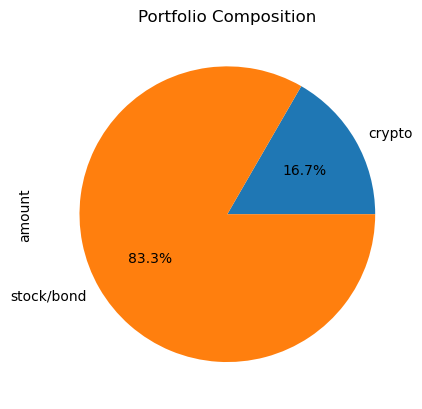

In [88]:
# Plot the total value of the member's portfolio (crypto and stock/bond) in a pie chart

import matplotlib.pyplot as plt

# create the pie chart
savings_df.plot(kind='pie', y='amount', legend=False, autopct='%1.1f%%')

# add a title to the chart
plt.title('Portfolio Composition')

# display the chart
plt.show()


#### Step 4: Using Python, determine if the current portfolio has enough to create an emergency fund as part of the member’s financial plan. Ideally, an emergency fund should equal to three times the member’s monthly income. To do this, implement the following steps:

Step 1. Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

Step 2. Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)


##### Step 4-1: Create a variable named `emergency_fund_value`, and set it equal to three times the value of the member’s `monthly_income` of 12000. (You set this earlier in Part 1).

In [89]:
# Create a variable named emergency_fund_value
# YOUR CODE HERE
monthly_income = 12000
emergency_fund_value = 3 * monthly_income

##### Step 4-2: Create a series of three if statements to determine if the member’s total portfolio is large enough to fund the emergency portfolio:

* If the total portfolio value is greater than the emergency fund value, display a message congratulating the member for having enough money in this fund.

* Else if the total portfolio value is equal to the emergency fund value, display a message congratulating the member on reaching this important financial goal.

* Else the total portfolio is less than the emergency fund value, so display a message showing how many dollars away the member is from reaching the goal. (Subtract the total portfolio value from the emergency fund value.)

In [94]:
# Evaluate the possibility of creating an emergency fund with 3 conditions:
emergency_fund_value = monthly_income * 3

total_valuation = crypto_valuation + total_stocks_bonds

if total_valuation > emergency_fund_value:
    print("Congratulations! You have enough money in your emergency fund.")

elif total_valuation == emergency_fund_value:
    print("Congratulations! You have reached your emergency fund goal.")

else:
    shortfall = emergency_fund_value - total_valuation
    print(f"You are ${shortfall} away from your emergency fund goal.")



Congratulations! You have enough money in your emergency fund.


## Part 2: Create a Financial Planner for Retirement

### Create the Monte Carlo Simulation

In this section, you’ll use the MCForecastTools library to create a Monte Carlo simulation for the member’s savings portfolio. To do this, complete the following steps:

1. Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

2. Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.The following image shows the overlay line plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the resulting plot.](Images/5-4-monte-carlo-line-plot.png)

3. Plot the probability distribution of the Monte Carlo simulation. Plot the probability distribution of the Monte Carlo simulation. The following image shows the histogram plot resulting from a simulation with these characteristics. However, because a random number generator is used to run each live Monte Carlo simulation, your image will differ slightly from this exact image:

![A screenshot depicts the histogram plot.](Images/5-4-monte-carlo-histogram.png)

4. Generate the summary statistics for the Monte Carlo simulation.



In [111]:
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
from datetime import datetime, timedelta
alpaca_api_key = "ALPACA_API_KEY"
alpaca_secret_key = "ALPACA_SECRET_KEY"
base_url = 'https://paper-api.alpaca.markets'
api = tradeapi.REST(api_key, api_secret, base_url, api_version='v2')



In [112]:
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")

# Define the assets and the time frame
tickers = ["SPY", "AGG"]
timeframe = "1D"
start_date = pd.Timestamp.now() - pd.DateOffset(years=3)

# Get the historical closing prices
closing_prices = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=pd.Timestamp.now(),
    limit=None,
    after=None,
    until=None,
    interpolate=None
).df["close"]

AttributeError: 'REST' object has no attribute 'get_barset'

#### Step 1: Make an API call via the Alpaca SDK to get 3 years of historical closing prices for a traditional 60/40 portfolio split: 60% stocks (SPY) and 40% bonds (AGG).

In [116]:
# Set start and end dates of 3 years back from your current date
# Alternatively, you can use an end date of 2020-08-07 and work 3 years back from that date 
# Set the Alpaca API endpoint URL and key
# Set Alpaca API endpoint and keys


# Initialize Alpaca API
api = tradeapi.REST(api_key, alpaca_secret_key)

# Define portfolio tickers and weights
portfolio = {
    'SPY': 0.6,
    'AGG': 0.4
}

# Set timeframe and date range
timeframe = '1D'
end_date = datetime.today().strftime('%Y-%m-%d')
start_date = (datetime.today() - timedelta(days=3*365)).strftime('%Y-%m-%d')

# Get historical pricing data
barset = api.get_barset(
    symbols=list(portfolio.keys()),
    timeframe=timeframe,
    start=start_date,
    end=end_date
)

# Extract closing prices from barset and combine into a single DataFrame
closing_prices = pd.DataFrame({
    ticker: [bar.close for bar in bars]
    for ticker, bars in barset.items()
})

# Calculate daily returns
returns = closing_prices.pct_change().dropna()

 #Get the historical pricing data
df = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df
# Display the DataFrame
print(returns)



AttributeError: 'REST' object has no attribute 'get_barset'

#### Step 2: Run a Monte Carlo simulation of 500 samples and 30 years for the 60/40 portfolio, and then plot the results.

In [115]:
# Configure the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights should be split 40% to AGG and 60% to SPY.
# Run 500 samples.

# Define the 60/40 portfolio weights and the initial investment amount
weights = [0.6, 0.4]
initial_investment = 10000

# Define the MCSimulation instance
mc_simulation = MCSimulation(
    portfolio_data = df,
    weights = weights,
    num_simulation = 500,
    num_trading_days = 252*30,
    initial_investment = initial_investment
)

# Run the Monte Carlo simulation
mc_simulation.calc_cumulative_return()

# Plot the simulation results
line_plot = mc_simulation.plot_simulation()


NameError: name 'df' is not defined

In [117]:
# Run the Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE
# Import necessary libraries

# Define the number of simulations and number of years to simulate
num_sims = 500
num_years = 30

# Create a new MCSimulation instance for the 60/40 portfolio
mc_sim = MCSimulation(
    portfolio_data = df,
    weights = [.6, .4],
    num_simulation = num_sims,
    num_trading_days = 252 * num_years
)

# df is defined at the top but it is getting error with the barset funtion from the top 

# Run the Monte Carlo simulation
mc_sim.calc_cumulative_return()

# Get the simulated returns as a DataFrame
simulated_returns_data = mc_sim.simulated_return_dataframe

# Plot the cumulative returns
mc_sim.plot_simulation()


NameError: name 'df' is not defined

In [119]:
# Visualize the 30-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE
# Generate the line plot
mc_line_plot = mc_sim.plot_simulation()

# Customize the plot
mc_line_plot.set_xlabel("Years")
mc_line_plot.set_ylabel("Cumulative Returns")
mc_line_plot.set_title("Monte Carlo Simulation: 30 Year Cumulative Returns")

# Save the plot as PNG
plt.savefig("monte_carlo_simulation.png")


NameError: name 'mc_sim' is not defined

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

In [ ]:
# Visualize the probability distribution of the 30-year Monte Carlo simulation 
# by plotting a histogram

dist_plot = MC_thirty_year.plot_distribution()


#### Step 4: Generate the summary statistics for the Monte Carlo simulation.

In [ ]:
# Generate summary statistics from the 30-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE
summary_stats = MC_portfolio.summarize_cumulative_return()


### Analyze the Retirement Portfolio Forecasts

Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the Monte Carlo simulation, answer the following question in your Jupyter notebook:

-  What are the lower and upper bounds for the expected value of the portfolio with a 95% confidence interval?


In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE
confidence_interval = ending_returns.quantile(q=[0.025, 0.975])

# Print the lower and upper bounds for the expected value of the portfolio
print(f"The 95% confidence interval for the ending returns is between ${round(confidence_interval.iloc[0]*initial_investment,2)} and ${round(confidence_interval.iloc[1]*initial_investment,2)}")

In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
lower_bound = initial_investment * confidence_interval[0]
upper_bound = initial_investment * confidence_interval[1]

range_lower = lower_bound - initial_investment
range_upper = upper_bound - initial_investment


### Forecast Cumulative Returns in 10 Years

The CTO of the credit union is impressed with your work on these planning tools but wonders if 30 years is a long time to wait until retirement. So, your next task is to adjust the retirement portfolio and run a new Monte Carlo simulation to find out if the changes will allow members to retire earlier.

For this new Monte Carlo simulation, do the following: 

- Forecast the cumulative returns for 10 years from now. Because of the shortened investment horizon (30 years to 10 years), the portfolio needs to invest more heavily in the riskier asset&mdash;that is, stock&mdash;to help accumulate wealth for retirement. 

- Adjust the weights of the retirement portfolio so that the composition for the Monte Carlo simulation consists of 20% bonds and 80% stocks. 

- Run the simulation over 500 samples, and use the same data that the API call to Alpaca generated.

- Based on the new Monte Carlo simulation, answer the following questions in your Jupyter notebook:

    - Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

    - Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?


In [ ]:
# Configure a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights should be split 20% to AGG and 80% to SPY.
# Run 500 samples.
# YOUR CODE HERE

# Review the simulation input data
# YOUR CODE HERE


In [ ]:
# Run the Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE


In [ ]:
# Visualize the 10-year Monte Carlo simulation by creating an
# overlay line plot
# YOUR CODE HERE


In [ ]:
# Visualize the probability distribution of the 10-year Monte Carlo simulation 
# by plotting a histogram
# YOUR CODE HERE


In [ ]:
# Generate summary statistics from the 10-year Monte Carlo simulation results
# Save the results as a variable
# YOUR CODE HERE


# Review the 10-year Monte Carlo summary statistics
# YOUR CODE HERE

### Answer the following questions:

#### Question: Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

In [ ]:
# Print the current balance of the stock and bond portion of the members portfolio
# YOUR CODE HERE


In [ ]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = # YOUR CODE HERE
ci_upper_ten_cumulative_return = # YOUR CODE HERE

# Print the result of your calculations
# YOUR CODE HERE


#### Question: Will weighting the portfolio more heavily to stocks allow the credit union members to retire after only 10 years?